# Exploratory data analysis

In [1]:
# https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

In [2]:
# !pip install regex
# !pip install wheel
# !apt-get install python3

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import collections
import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

In [4]:
df_reddit = pickle.load(open('../DataSet/df_reddit.pkl', 'rb'))
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA


In [5]:
df_reddit.shape

(12000, 10)

In [6]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        12000 non-null  object
 1   created_utc   12000 non-null  int64 
 2   domain        12000 non-null  object
 3   id            12000 non-null  object
 4   num_comments  12000 non-null  int64 
 5   over_18       12000 non-null  bool  
 6   post_hint     12000 non-null  object
 7   score         12000 non-null  int64 
 8   text_merged   12000 non-null  object
 9   subreddit     12000 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 855.6+ KB


## Exploratory data analysis on data.

* Count the number of words on text and add a new column with number of words.
* Apply sentiment analyzer on each text and add it as a new column.
* seperate the date and add it to data.

In [7]:
nltk.download('vader_lexicon')
# Mighani Approach:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])

df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

[nltk_data] Downloading package vader_lexicon to C:\Users\DASLAB
[nltk_data]     Hareland 3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
df_reddit.shape

(12000, 13)

In [9]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author            12000 non-null  object        
 1   created_utc       12000 non-null  int64         
 2   domain            12000 non-null  object        
 3   id                12000 non-null  object        
 4   num_comments      12000 non-null  int64         
 5   over_18           12000 non-null  bool          
 6   post_hint         12000 non-null  object        
 7   score             12000 non-null  int64         
 8   text_merged       12000 non-null  object        
 9   subreddit         12000 non-null  object        
 10  word_count*       12000 non-null  int64         
 11  sentiment_score*  12000 non-null  float64       
 12  date              12000 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage:

Lets turn the subreddit column to numerical values.

In [10]:
df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
targets = df_reddit['target']

In [11]:
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA,4,0.0000,2020-01-19 05:55:05,1
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA,5,0.0000,2020-01-19 05:44:40,1
2,NASA_POTD_bot,1579410507,apod.nasa.gov,eqs6cb,0,False,Empty,1,incred expand crab nebula,NASA,4,0.3182,2020-01-19 05:08:27,1
3,AMC-Eagle85,1579410277,i.redd.it,eqs4zd,6,False,Empty,1,columbia readi st,NASA,3,0.0000,2020-01-19 05:04:37,1
4,BorisTheSpacePerson,1579404939,i.redd.it,eqr7wu,0,False,Empty,1,went ksc christma got see made interest spacef...,NASA,8,0.4588,2020-01-19 03:35:39,1


Let's check out and see if there is any correlation between different parameters in our df.

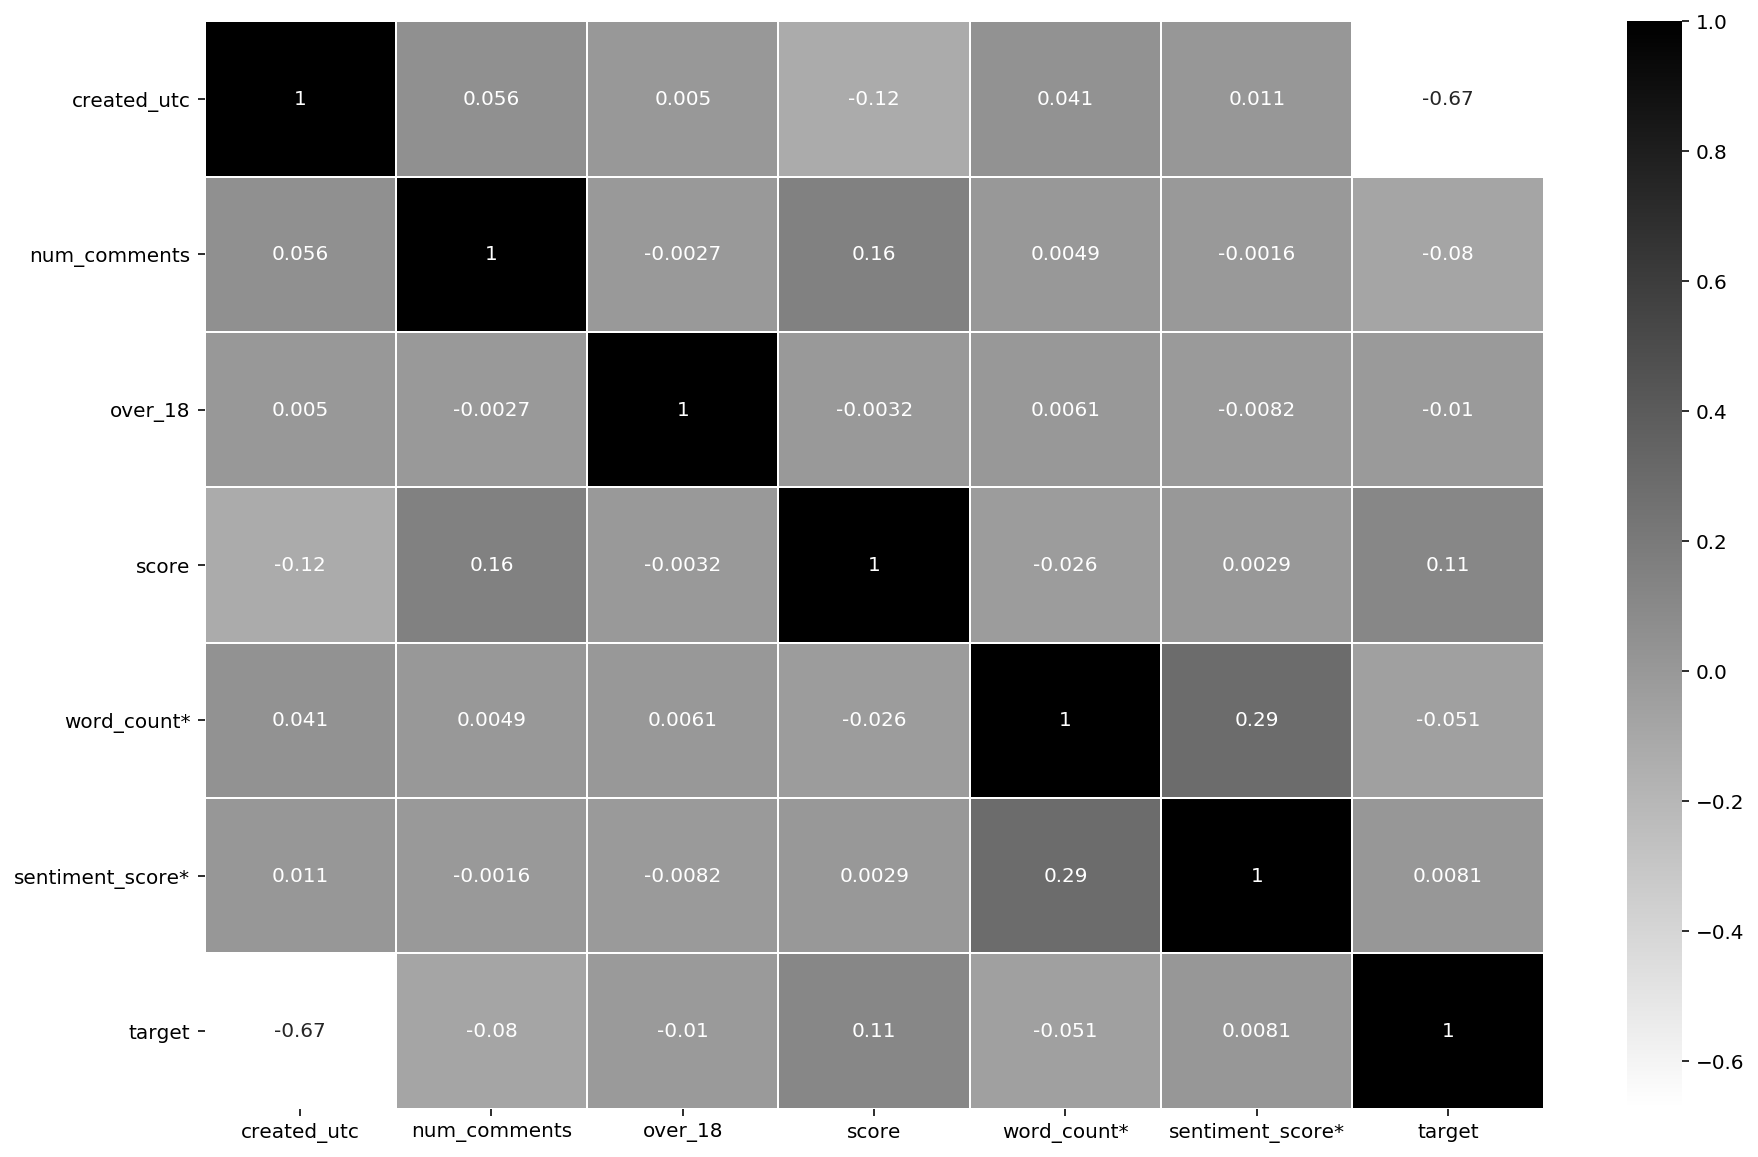

In [12]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)
plt.savefig("../Figures/corr_plot_before_colDroped1.png")

In [13]:
# mask = np.triu(np.ones_like(df_reddit_corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# plt.figure(figsize=(15,10))
# sns.heatmap(df_reddit_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.savefig("../Figures/corr_plot_before_colDroped2.png")

Drop the column named domain below to focus just on information from the comments. Word count and sentiment can extract from comments directly.

In [14]:
cols = ['domain', 'author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'date', 'subreddit']

df_reddit.drop(columns=cols, inplace = True)

In [15]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target
0,star shine saturn ring,4,0.0000,1
1,smithsonian nation air space museum,5,0.0000,1
2,incred expand crab nebula,4,0.3182,1
3,columbia readi st,3,0.0000,1
4,went ksc christma got see made interest spacef...,8,0.4588,1


In [16]:
df_reddit.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count*,12000.0,14.51050,31.921244,1.0000,5.0,8.0,13.0000,996.0000
sentiment_score*,12000.0,0.10209,0.303670,-0.9967,0.0,0.0,0.1779,0.9985
target,12000.0,0.50000,0.500021,0.0000,0.0,0.5,1.0000,1.0000


Keep the track of nasa and space_discussion as follow.

In [17]:
sub_nasa_mask = df_reddit["target"] == 1
sub_space_mask = df_reddit["target"] == 0

In [18]:
df_reddit.groupby("target")["word_count*"].describe().T

target,0,1
count,6000.000000,6000.000000
mean,16.128167,12.892833
std,37.270810,25.372301
min,1.000000,1.000000
25%,5.000000,4.000000
50%,8.000000,7.000000
75%,15.000000,11.000000
max,996.000000,531.000000


NASA has a lower average word count compare to Space with a smaller standard deviation. let's look at the hist and compare it with space.

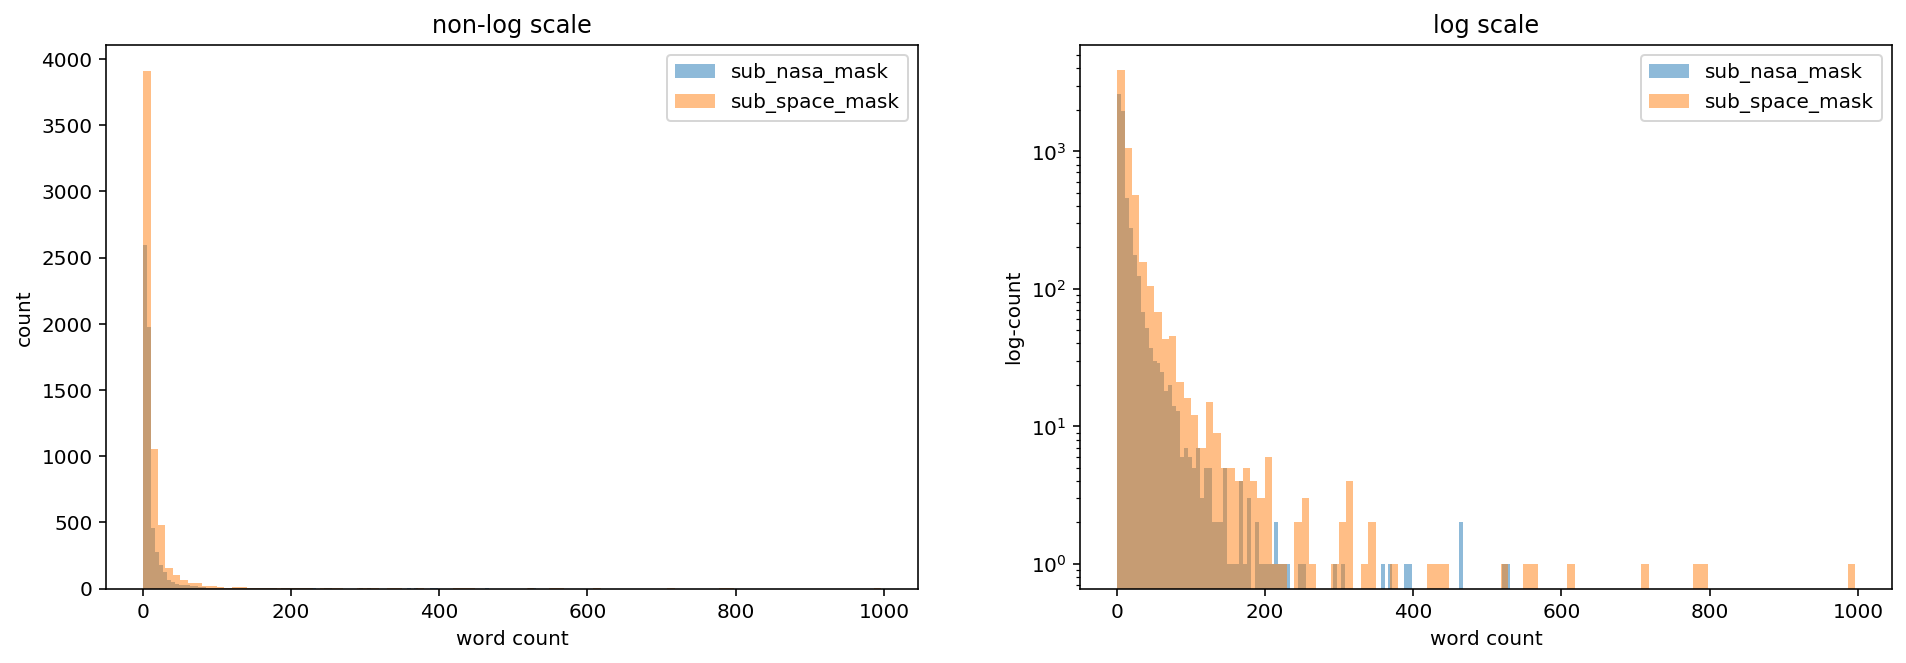

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.hist(df_reddit[sub_nasa_mask]['word_count*'], 
            alpha=0.5, bins=100, label='sub_nasa_mask')

plt.hist(df_reddit[sub_space_mask]['word_count*'], 
            alpha=0.5, bins=100, label='sub_space_mask')
plt.xlabel('word count'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')

plt.subplot(1, 2, 2)
plt.hist(df_reddit[sub_nasa_mask]['word_count*'], 
            alpha=0.5, bins=100, label='sub_nasa_mask', log=True)

plt.hist(df_reddit[sub_space_mask]['word_count*'], 
            alpha=0.5, bins=100, label='sub_space_mask', log=True)
plt.xlabel('word count'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.show()

plt.savefig("../Figures/word_sentiment_analysis_plot1.png")

In [20]:
df_reddit.groupby("target")["sentiment_score*"].describe().T

target,0,1
count,6000.000000,6000.000000
mean,0.099642,0.104538
std,0.313211,0.293824
min,-0.996700,-0.972300
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.226300,0.077200
max,0.998500,0.994000


For the sentiment score, it is seen that both mean and std are pretty close. Let's plot both NASA and space.

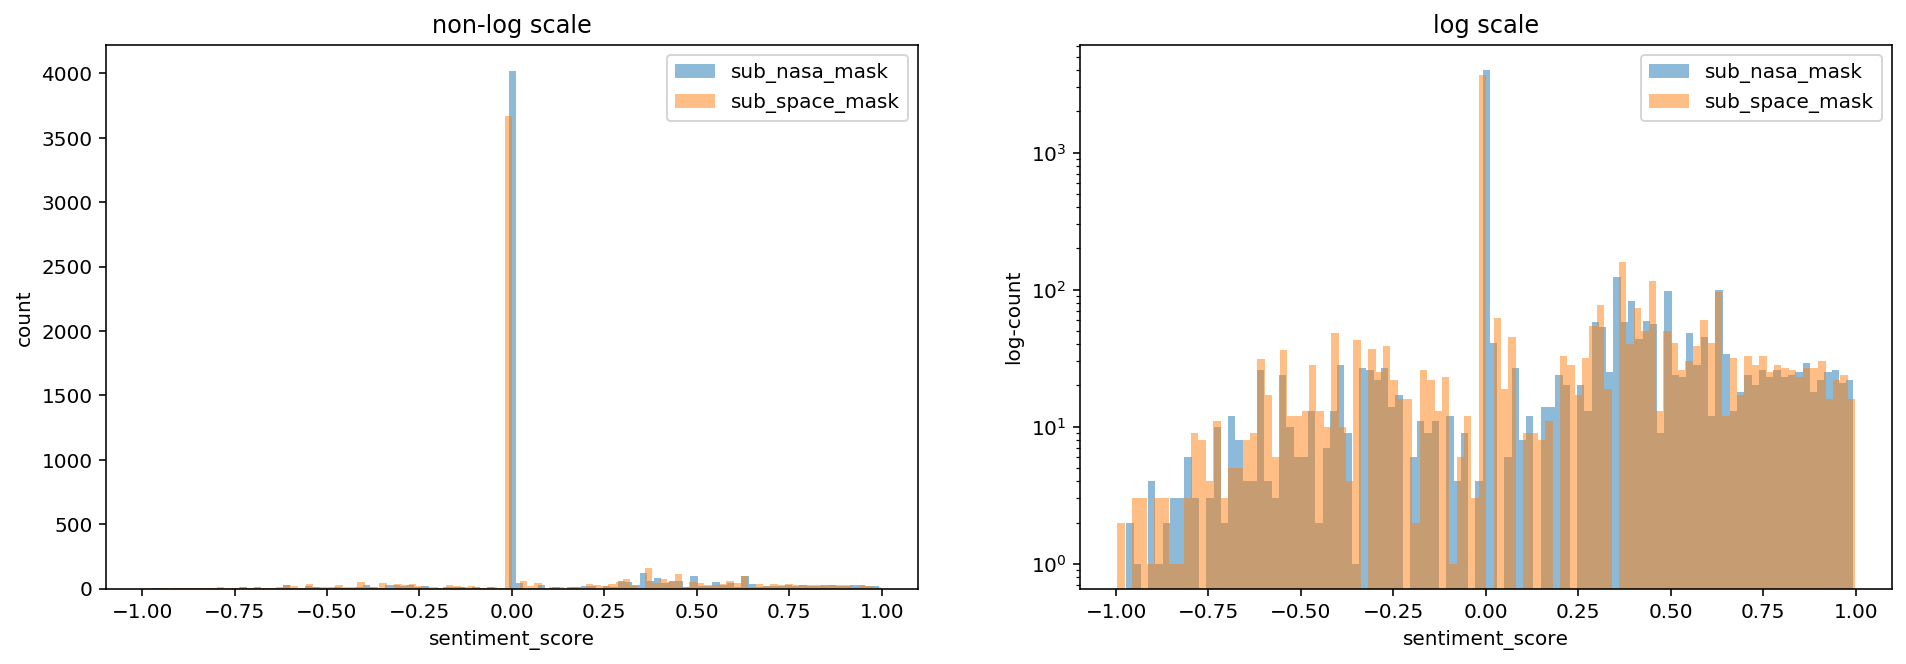

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.hist(df_reddit[sub_nasa_mask]['sentiment_score*'], 
            alpha=0.5, bins=100, label='sub_nasa_mask')

plt.hist(df_reddit[sub_space_mask]['sentiment_score*'], 
            alpha=0.5, bins=100, label='sub_space_mask')
plt.xlabel('sentiment_score'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')

plt.subplot(1, 2, 2)
plt.hist(df_reddit[sub_nasa_mask]['sentiment_score*'], 
            alpha=0.5, bins=100, label='sub_nasa_mask', log=True)

plt.hist(df_reddit[sub_space_mask]['sentiment_score*'], 
            alpha=0.5, bins=100, label='sub_space_mask', log=True)
plt.xlabel('sentiment_score'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.show()

plt.savefig("../Figures/word_sentiment_analysis_plot2.png")

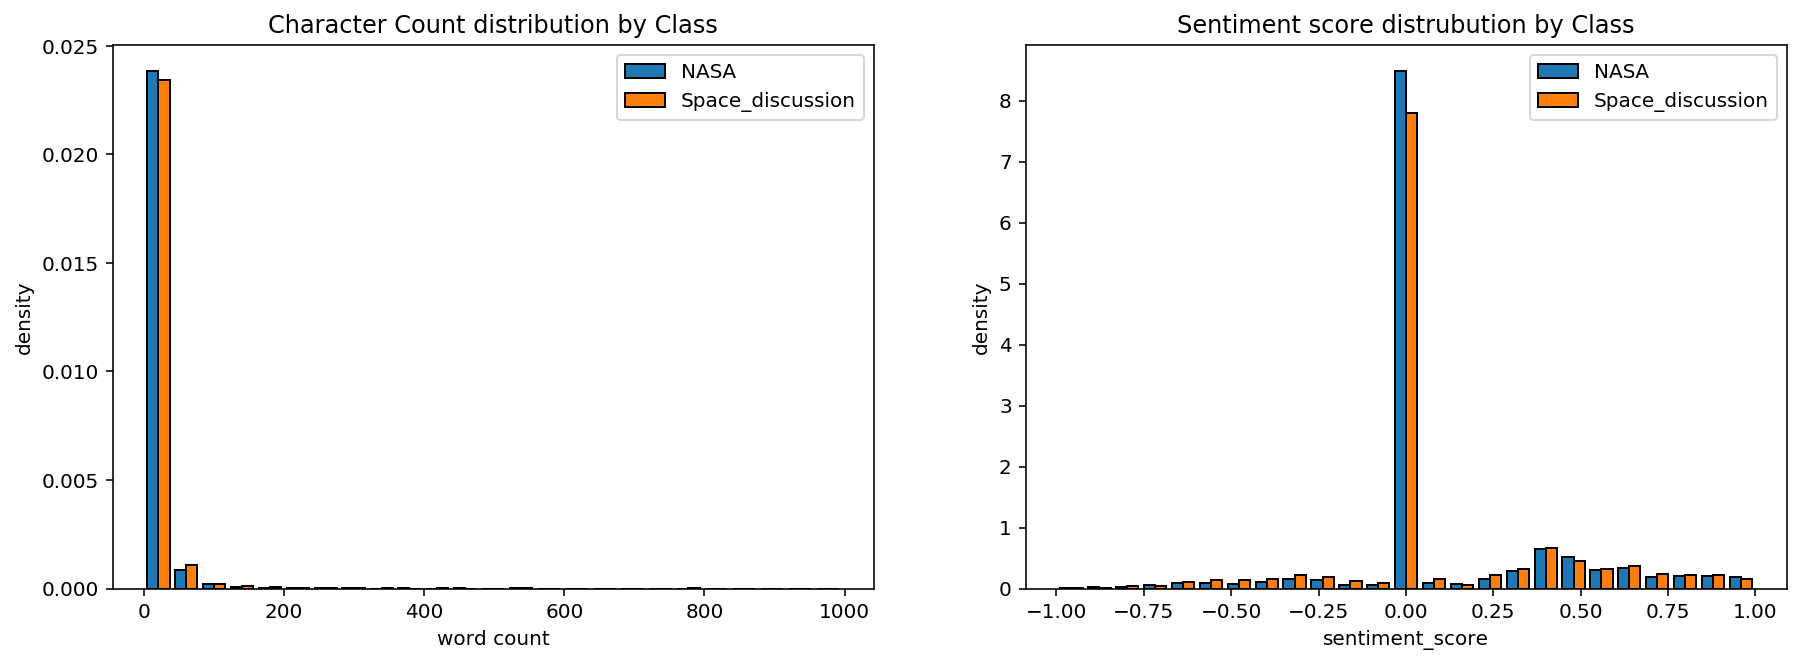

In [22]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['word_count*'], 
          df_reddit[sub_space_mask]['word_count*']],
          bins=25, ec='k', density=True)
plt.title('Character Count distribution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('word count'); plt.ylabel('density')


plt.subplot(1, 2, 2)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=25, ec='k', density=True)
plt.title('Sentiment score distrubution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')

plt.savefig("../Figures/word_sentiment_analysis_plot3.png")

It is seen that the negative sentiment scores for space are a little bit higher than NASA. People who are in NASA discussion have a more positive attitude compared to people who are in space discussion. Let's do the summation of sentiments for both space and NASA.

In [23]:
print('sum sentiment_score NASA = ', df_reddit[sub_nasa_mask]['sentiment_score*'].sum())
print('sum sentiment_score SPACE = ', df_reddit[sub_space_mask]['sentiment_score*'].sum())

sum sentiment_score NASA =  627.2271999999999
sum sentiment_score SPACE =  597.8522


In [24]:
print('sum word_count NASA = ', df_reddit[sub_nasa_mask]['word_count*'].sum())
print('sum word_count SPACE = ', df_reddit[sub_space_mask]['word_count*'].sum())

sum word_count NASA =  77357
sum word_count SPACE =  96769


Check out the correlation between current variables.

In [25]:
df_reddit_corr = df_reddit.corr()

In [26]:
df_reddit_corr

,word_count*,sentiment_score*,target
word_count*,1.000000,0.292337,-0.050679
sentiment_score*,0.292337,1.000000,0.008061
target,-0.050679,0.008061,1.000000


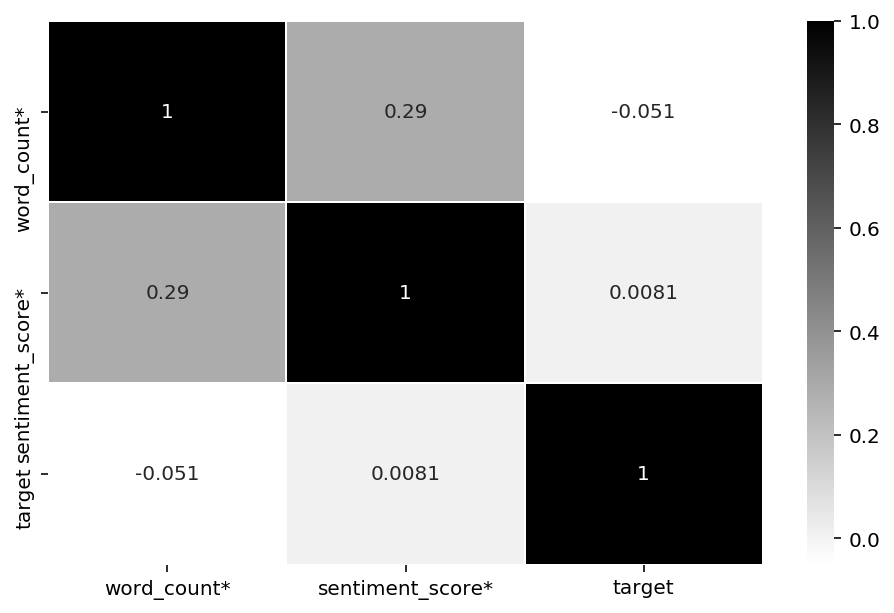

In [27]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(8,5))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)
plt.savefig("../Figures/corr_plot_before_colDroped2.png")

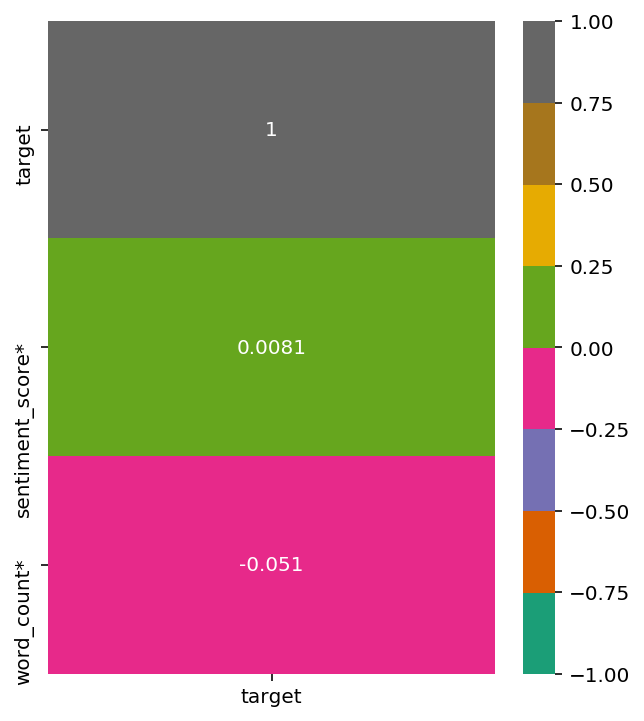

In [28]:
plt.figure(figsize=(5,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='Dark2',
            annot=True);

plt.savefig("../Figures/corr_plot_before_colDroped3.png")

## Let's focus on text and do count vectorize the data

Three steps are taken as follows:
* Add some stop words to the general list
* Apply the new list of stop words list (extend)
* Apply count vectorize to the data

### Count vectorizer

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)

cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                       ngram_range=(1,2))

In [30]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

In [31]:
len(cvec.get_feature_names())

7797

In [32]:
term_df = pd.DataFrame(term_mat.toarray(), 
                       columns=cvec.get_feature_names())
term_df.insert(0, 'targets', targets)

In [33]:
term_df.head()

,targets,aa,ab,ab secret,abandon,abc,abil,abl,abl build,abl captur,...,zealand,zero,zero graviti,zip,zone,zoom,zoom see,zubrin,zvezda,zvezda servic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# term_df.groupby('targets').mean()

In [35]:
# term_df.groupby('targets').mean().T.sort_values(0, ascending=False)

Lets see the top words in NASA, SPACE and then see the top overlap words.

In [36]:
top_words_nasa = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(100).index)

top_words_space_dis = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(100).index)

top_words_overlap = [word for word in top_words_space_dis if word in top_words_nasa]

In [37]:
print('top_words_nasa\n\n', top_words_nasa,
      '\n\ntop_words_space_dis\n\n', top_words_space_dis,
      '\n\ntop_words_overlap\n\n', top_words_overlap)

top_words_nasa

 ['nasa', 'space', 'moon', 'apollo', 'earth', 'astronaut', 'mission', 'mar', 'year', 'launch', 'work', 'like', 'one', 'first', 'get', 'new', 'amp', 'time', 'go', 'station', 'know', 'engin', 'th', 'land', 'look', 'intern', 'saturn', 'space station', 'photo', 'rocket', 'use', 'want', 'help', 'anyon', 'center', 'could', 'orbit', 'day', 'lunar', 'see', 'find', 'planet', 'got', 'anniversari', 'star', 'question', 'make', 'shuttl', 'internship', 'imag', 'system', 'program', 'test', 'made', 'way', 'back', 'flight', 'video', 'thank', 'th anniversari', 'intern space', 'iss', 'found', 'human', 'post', 'view', 'spacecraft', 'think', 'today', 'take', 'solar', 'scienc', 'say', 'seen', 'moon land', 'research', 'need', 'explor', 'live', 'us', 'interest', 'rover', 'ago', 'artemi', 'realli', 'peopl', 'plan', 'watch', 'space center', 'space shuttl', 'also', 'modul', 'sun', 'asteroid', 'pictur', 'black', 'telescop', 'lroc', 'jupit', 'name'] 

top_words_space_dis

 ['space', 'earth', 'nasa'

As it is seen these two topics are very close! The top words for NASA are space, earth, NASA, moon which have three out of four similar to space. 

In [38]:
top_words_space_notin_nasa = [word for word in top_words_space_dis if word not in top_words_nasa]
print('top_words_space_not_in_nasa\n\n', top_words_space_notin_nasa)

top_words_space_not_in_nasa

 ['univers', 'hole', 'black hole', 'galaxi', 'light', 'satellit', 'life', 'spacex', 'sky', 'around', 'even', 'night', 'show', 'possibl', 'thing', 'scientist', 'matter', 'travel', 'dark', 'milki', 'milki way', 'astronom', 'start', 'nebula', 'someth', 'happen', 'object', 'thought', 'world', 'captur', 'solar system', 'exist', 'right', 'two', 'away', 'ever', 'may', 'long']


In [39]:
top_words_nasa_notin_space = [word for word in top_words_nasa if word not in top_words_space_dis]
print('top_words_nasa_not_in_space\n\n', top_words_nasa_notin_space)

top_words_nasa_not_in_space

 ['station', 'engin', 'th', 'intern', 'saturn', 'space station', 'center', 'lunar', 'got', 'anniversari', 'shuttl', 'internship', 'program', 'flight', 'thank', 'th anniversari', 'intern space', 'iss', 'post', 'spacecraft', 'today', 'scienc', 'seen', 'moon land', 'research', 'explor', 'interest', 'rover', 'ago', 'artemi', 'plan', 'space center', 'space shuttl', 'modul', 'asteroid', 'lroc', 'jupit', 'name']


### Number of characters present in each sentence

(<matplotlib.legend.Legend at 0x2c966236ac8>, Text(0.5, 1.0, 'non-log scale'))

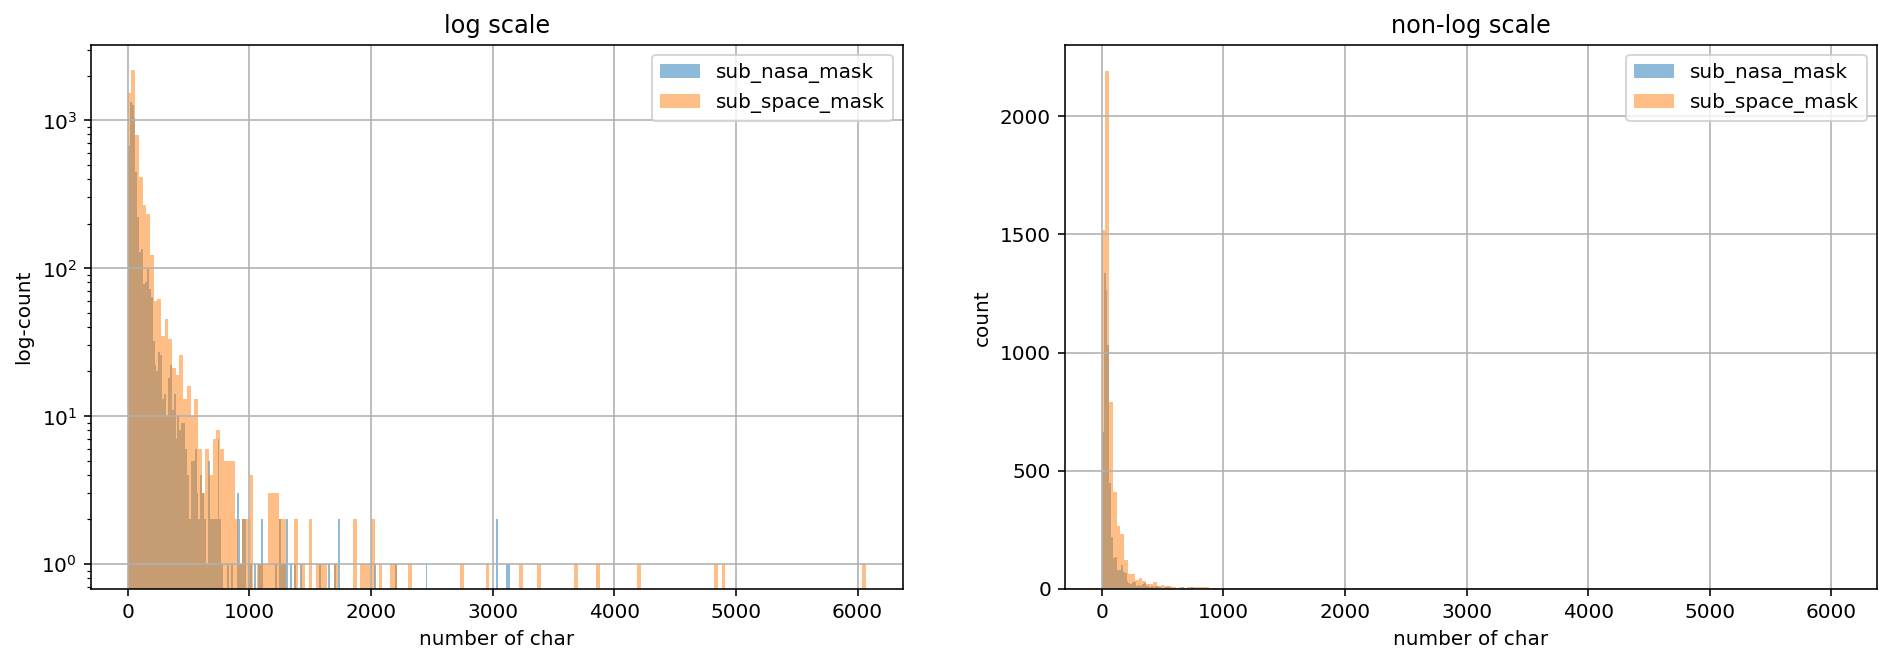

In [40]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_reddit[sub_nasa_mask]['text_merged'].str.len().hist(bins=200, log=True, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_merged'].str.len().hist(bins=200, log=True, alpha=0.5, label='sub_space_mask')
plt.xlabel('number of char'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.subplot(1, 2, 2)
df_reddit[sub_nasa_mask]['text_merged'].str.len().hist(bins=200, log=False, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_merged'].str.len().hist(bins=200, log=False, alpha=0.5, label='sub_space_mask')
plt.xlabel('number of char'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')


### Average word length in each sentence

(<matplotlib.legend.Legend at 0x2c966c87fd0>, Text(0.5, 1.0, 'non-log scale'))

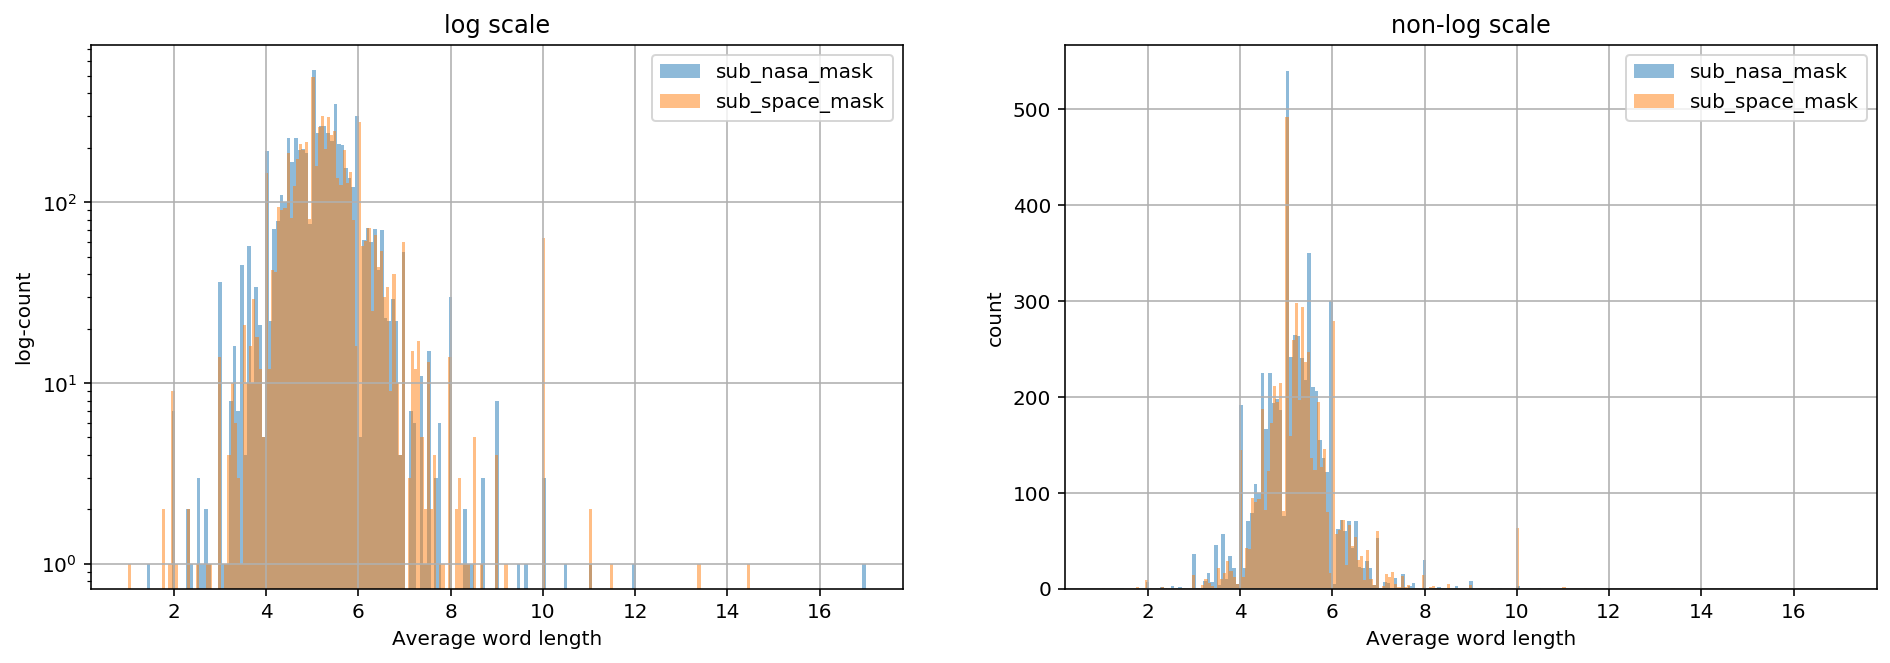

In [41]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_reddit[sub_nasa_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=True, alpha=0.5, label='sub_nasa_mask')

df_reddit[sub_space_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=True, alpha=0.5, label='sub_space_mask')
plt.xlabel('Average word length'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.subplot(1, 2, 2)
df_reddit[sub_nasa_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=False, alpha=0.5, label='sub_nasa_mask')

df_reddit[sub_space_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=False, alpha=0.5, label='sub_space_mask')
plt.xlabel('Average word length'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')


Again both topics are pretty close in term of average word length and number fo characters.

### Inspect which words other than stopwords occur frequently

Text(0.5, 1.0, 'Space')

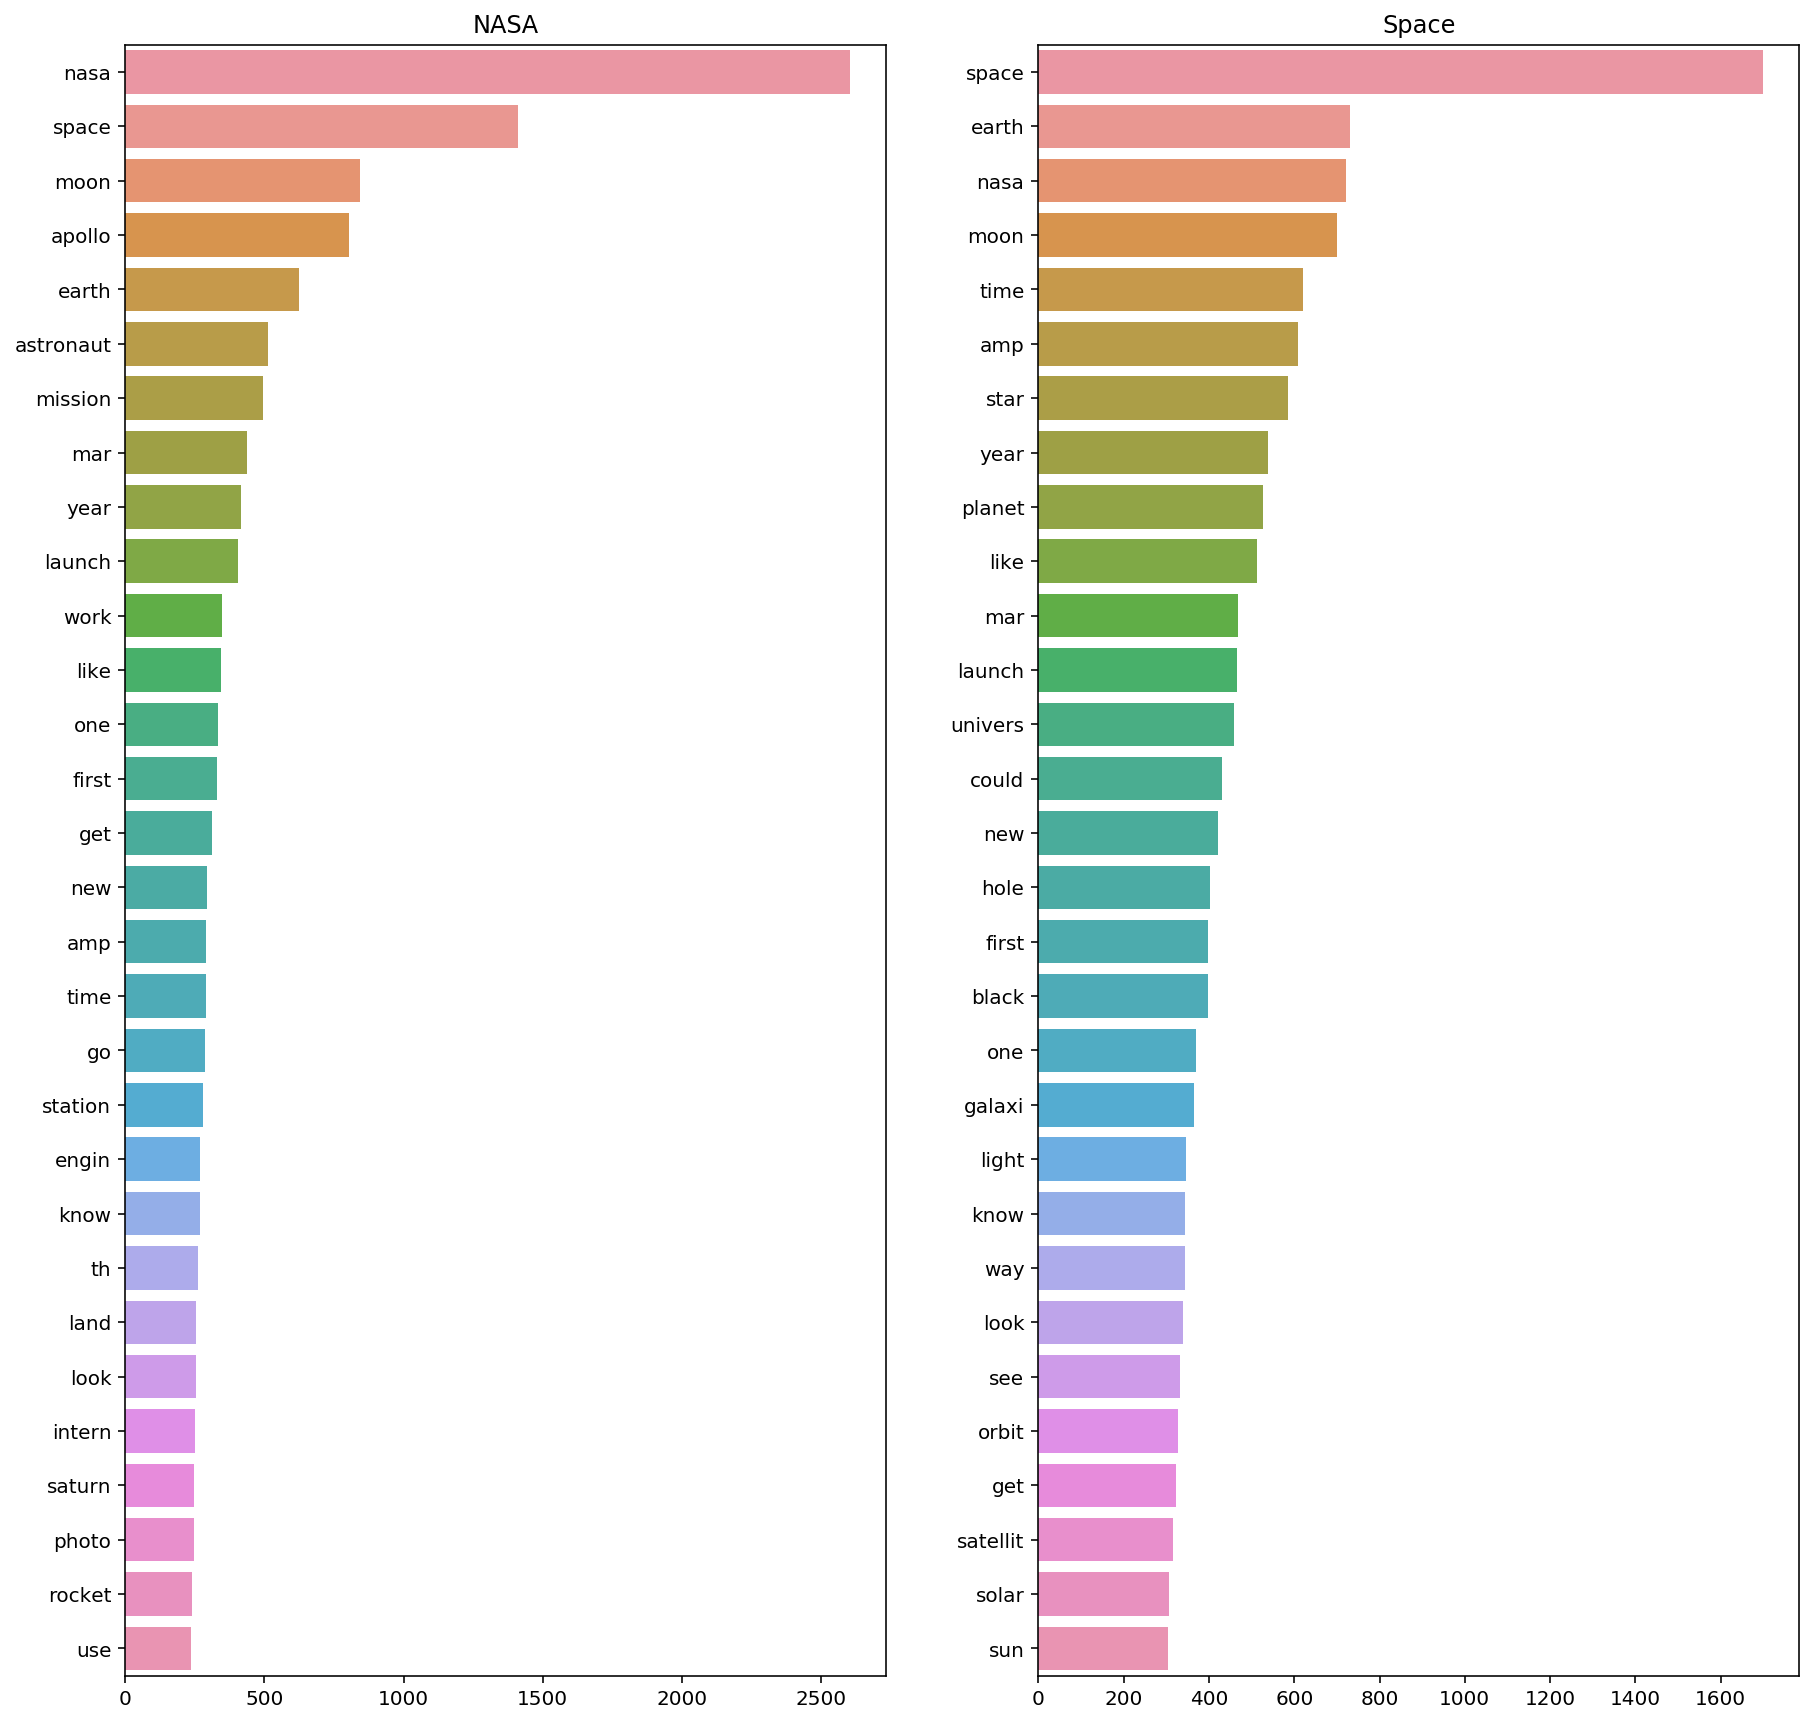

In [42]:
plt.figure(figsize=(15,15))


corpus=[]
new= df_reddit[sub_nasa_mask]['text_merged'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1


# plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
plt.subplot(1, 2, 1)  
a = sns.barplot(x=y,y=x, label='sub_nasa_mask')
plt.title('NASA')


corpus=[]
new= df_reddit[sub_space_mask]['text_merged'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1


# plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
plt.subplot(1, 2, 2) 
a = sns.barplot(x=y,y=x, label='sub_space_mask')
plt.title('Space')

As it is seen the nasa, space, moon and earth are top words in comments.

### Looking at most frequent n-grams can give you a better understanding of the context 

In [43]:
from nltk.util import ngrams

### Bigrams

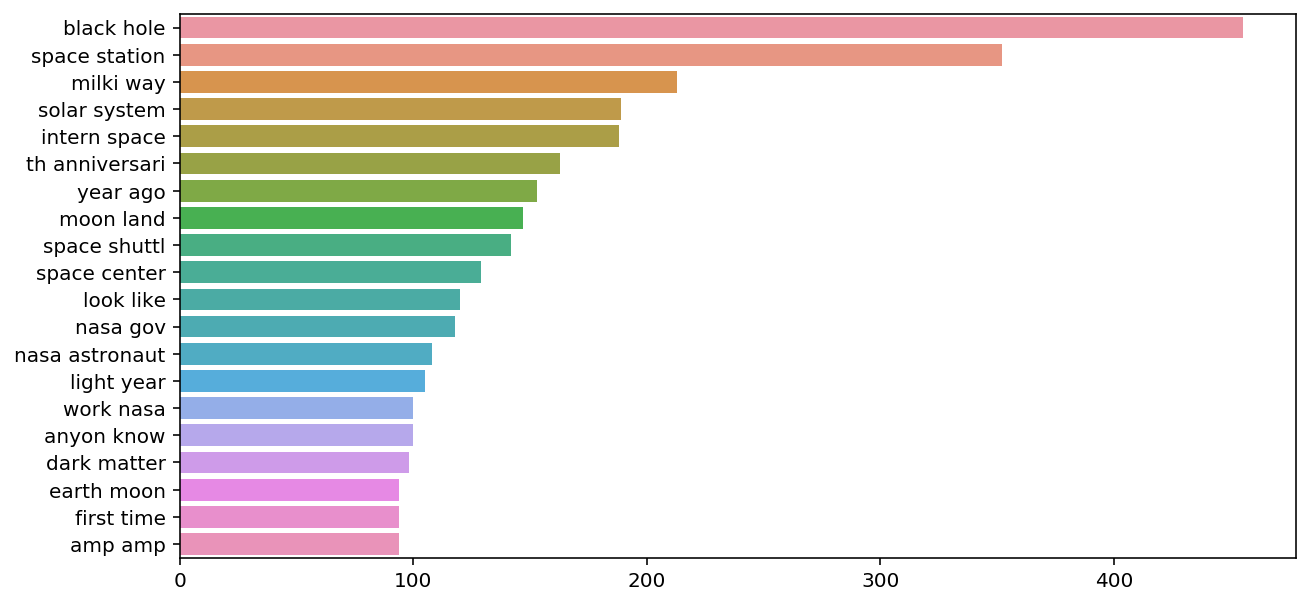

In [44]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=get_top_ngram(df_reddit['text_merged'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

### Trigrams

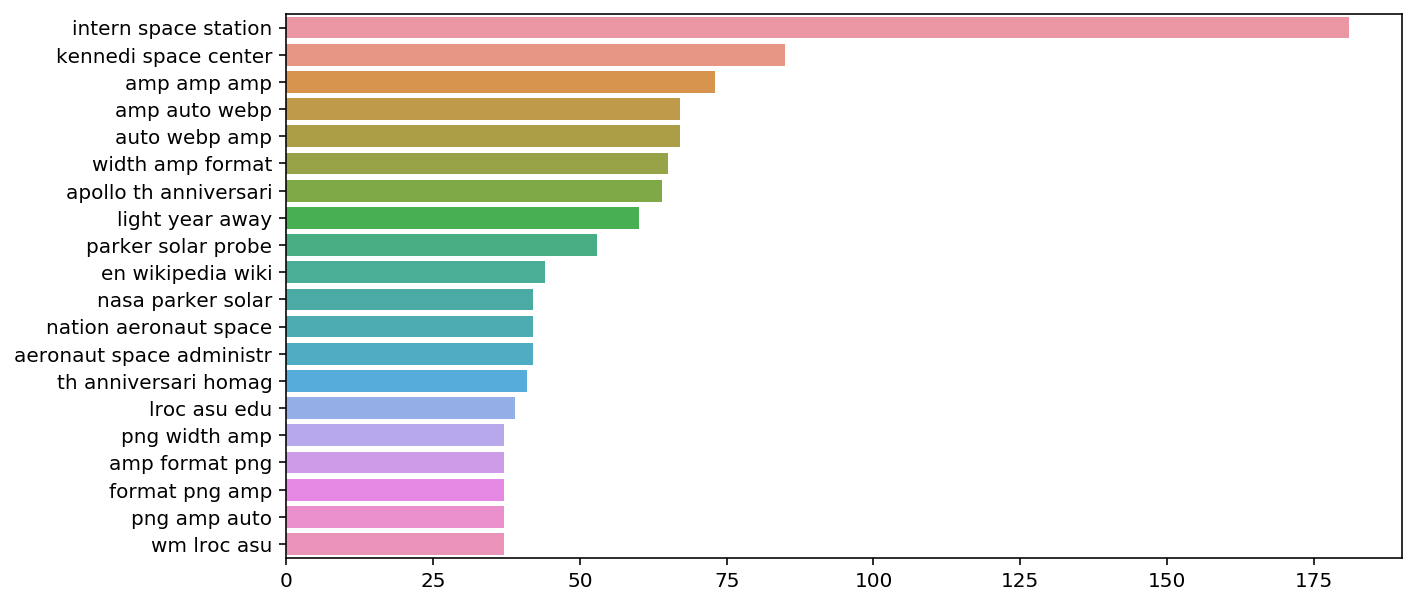

In [45]:
top_tri_grams=get_top_ngram(df_reddit['text_merged'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

### Topic Modeling exploration with pyLDAvis

This is unsupervised modeling. let's see what AI will see inside our data frame.

In [46]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df_reddit['text_merged']:
        words=[w for w in word_tokenize(news) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(df_reddit)

[nltk_data] Downloading package punkt to C:\Users\DASLAB Hareland
[nltk_data]     3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DASLAB Hareland
[nltk_data]     3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# !python -m pip install -U gensim

In [48]:
from gensim import models
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [49]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.027*"space" + 0.024*"nasa" + 0.012*"moon" + 0.009*"launch" + 0.007*"apollo" + 0.006*"astronaut" + 0.006*"mission" + 0.005*"get" + 0.005*"work" + 0.005*"rocket"'),
 (1,
  '0.012*"earth" + 0.010*"star" + 0.009*"mar" + 0.009*"planet" + 0.008*"amp" + 0.008*"time" + 0.008*"nasa" + 0.007*"year" + 0.007*"univers" + 0.007*"black"')]

The unsupervised correctly detect two main subjects as we expected. NASA and Space!

In [50]:
# !python -m pip install -U pyLDAvis

In [51]:
# import pyLDAvis
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
# vis

### Wordcloud

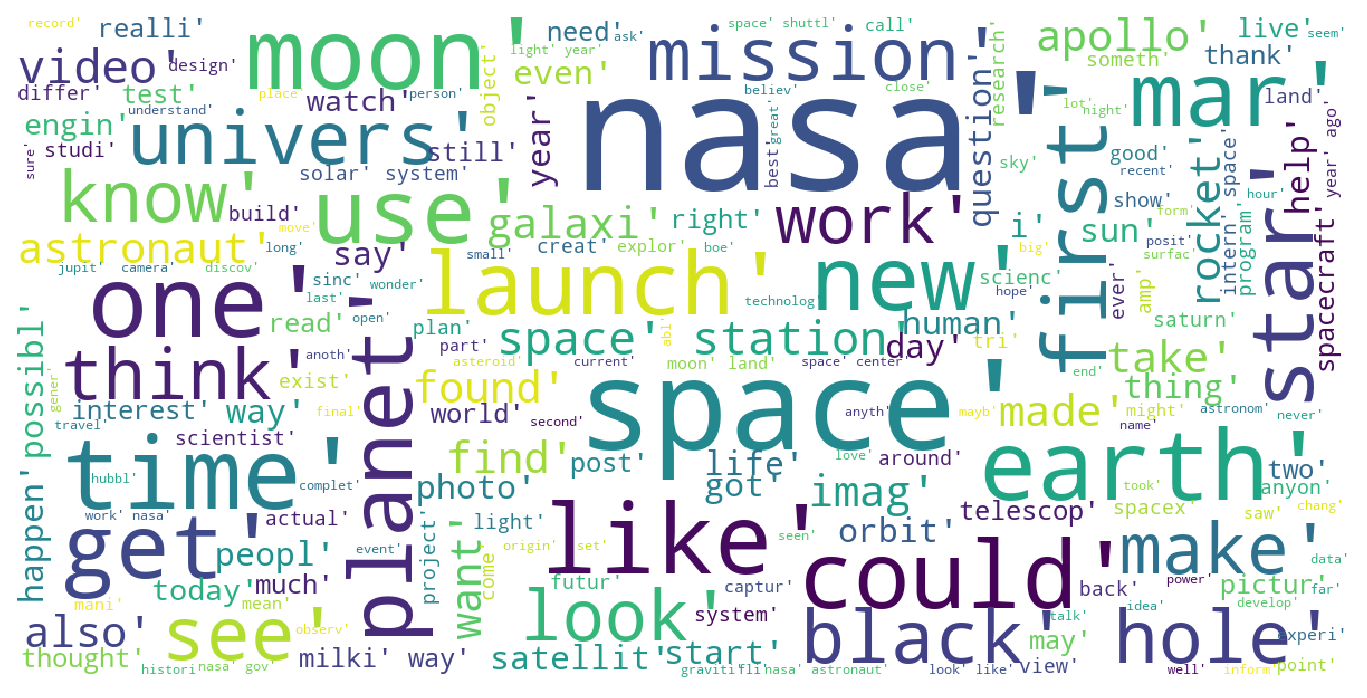

In [52]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)

### Textblob

In [53]:
# !pip3 install textblob

In [54]:
from textblob import TextBlob

Text(0.5, 1.0, 'polarity_score in log scale')

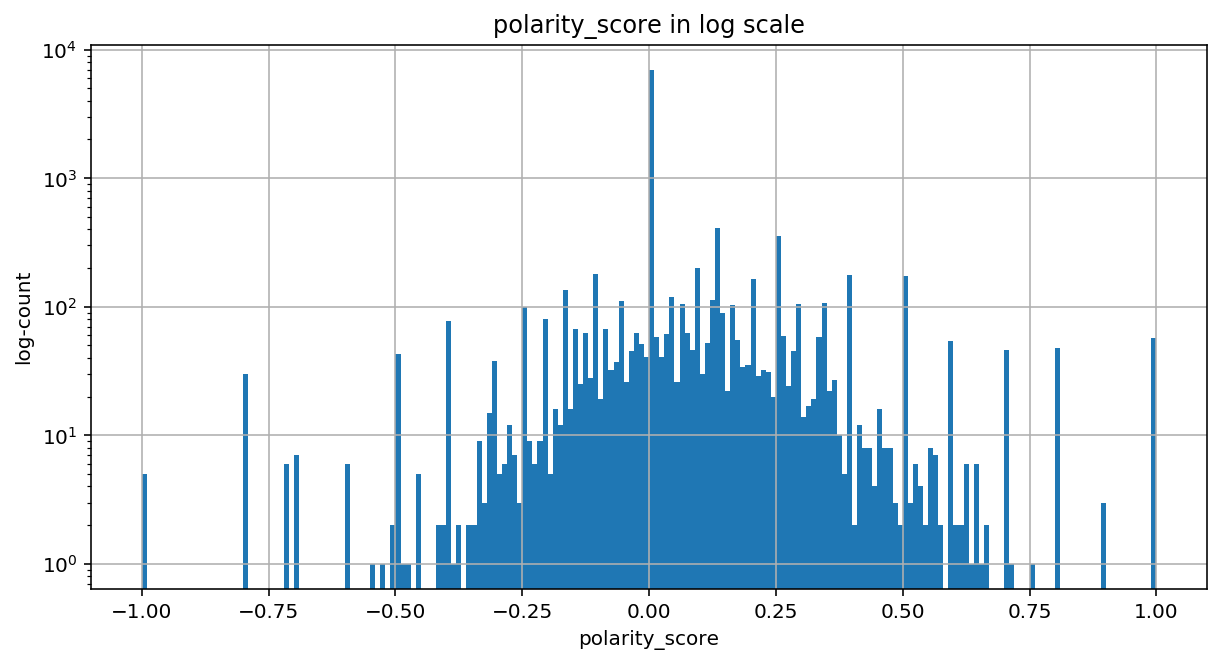

In [55]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_reddit['polarity_score']=df_reddit['text_merged'].apply(lambda x : polarity(x))

plt.figure(figsize=(10,5))
df_reddit['polarity_score'].hist(bins=200, log=True)

plt.xlabel('polarity_score'); 
plt.ylabel('log-count')
plt.title('polarity_score in log scale')

In [56]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score
0,star shine saturn ring,4,0.0000,1,0.0
1,smithsonian nation air space museum,5,0.0000,1,0.0
2,incred expand crab nebula,4,0.3182,1,0.0
3,columbia readi st,3,0.0000,1,0.0
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0


Text(0.5, 1.0, 'polarity_score')

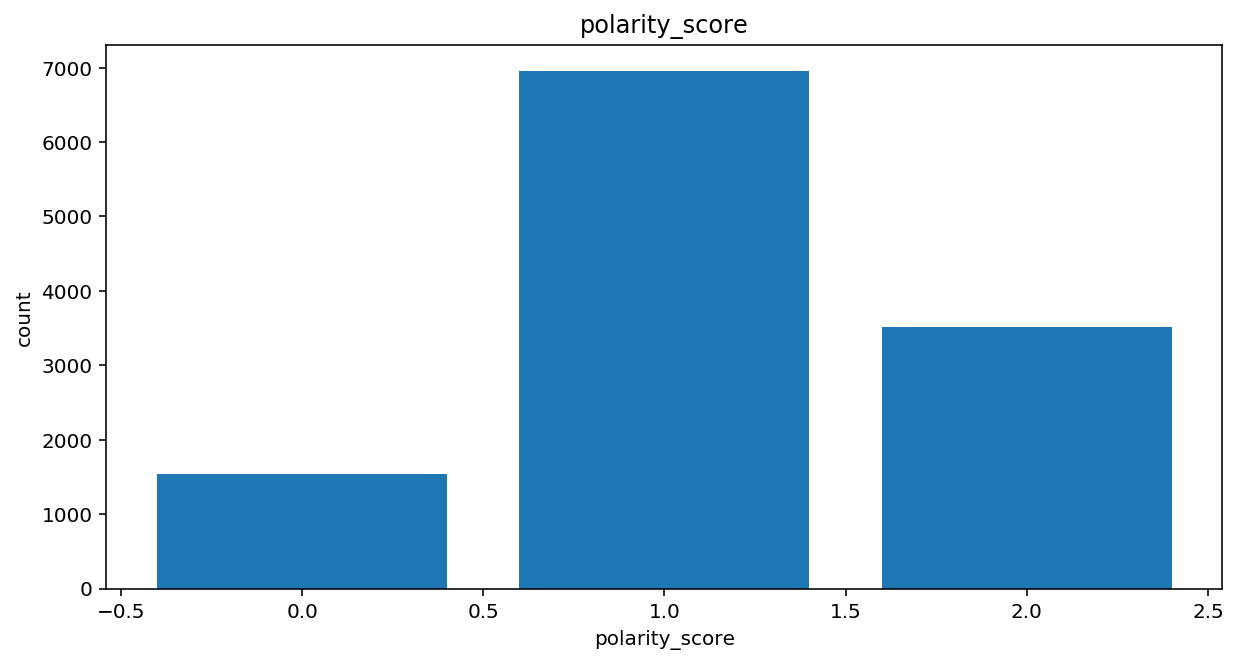

In [57]:
def sentiment(x):
    if x<0:
        return 0
    elif x==0:
        return 1
    else:
        return 2
    
df_reddit['polarity']=df_reddit['polarity_score'].map(lambda x: sentiment(x))

plt.figure(figsize=(10,5))

plt.bar(df_reddit.polarity.value_counts().index,
        df_reddit.polarity.value_counts())

plt.xlabel('polarity_score'); 
plt.ylabel('count')
plt.title('polarity_score')

In [58]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity
0,star shine saturn ring,4,0.0000,1,0.0,1
1,smithsonian nation air space museum,5,0.0000,1,0.0,1
2,incred expand crab nebula,4,0.3182,1,0.0,1
3,columbia readi st,3,0.0000,1,0.0,1
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1


In [59]:
# df_reddit['polarity'] = df_reddit['polarity'].replace({"neu": 2, "pos": 3, "neg": 1})

In [60]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity
0,star shine saturn ring,4,0.0000,1,0.0,1
1,smithsonian nation air space museum,5,0.0000,1,0.0,1
2,incred expand crab nebula,4,0.3182,1,0.0,1
3,columbia readi st,3,0.0000,1,0.0,1
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1


In [61]:
df_reddit.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count*,12000.0,14.510500,31.921244,1.0000,5.0,8.0,13.000000,996.0000
sentiment_score*,12000.0,0.102090,0.303670,-0.9967,0.0,0.0,0.177900,0.9985
target,12000.0,0.500000,0.500021,0.0000,0.0,0.5,1.000000,1.0000
polarity_score,12000.0,0.049904,0.184337,-1.0000,0.0,0.0,0.083333,1.0000
polarity,12000.0,1.164667,0.627097,0.0000,1.0,1.0,2.000000,2.0000


In [62]:
df_reddit.corr().T

,word_count*,sentiment_score*,target,polarity_score,polarity
word_count*,1.000000,0.292337,-0.050679,0.053004,0.105941
sentiment_score*,0.292337,1.000000,0.008061,0.414946,0.333992
target,-0.050679,0.008061,1.000000,-0.011361,-0.009568
polarity_score,0.053004,0.414946,-0.011361,1.000000,0.757983
polarity,0.105941,0.333992,-0.009568,0.757983,1.000000


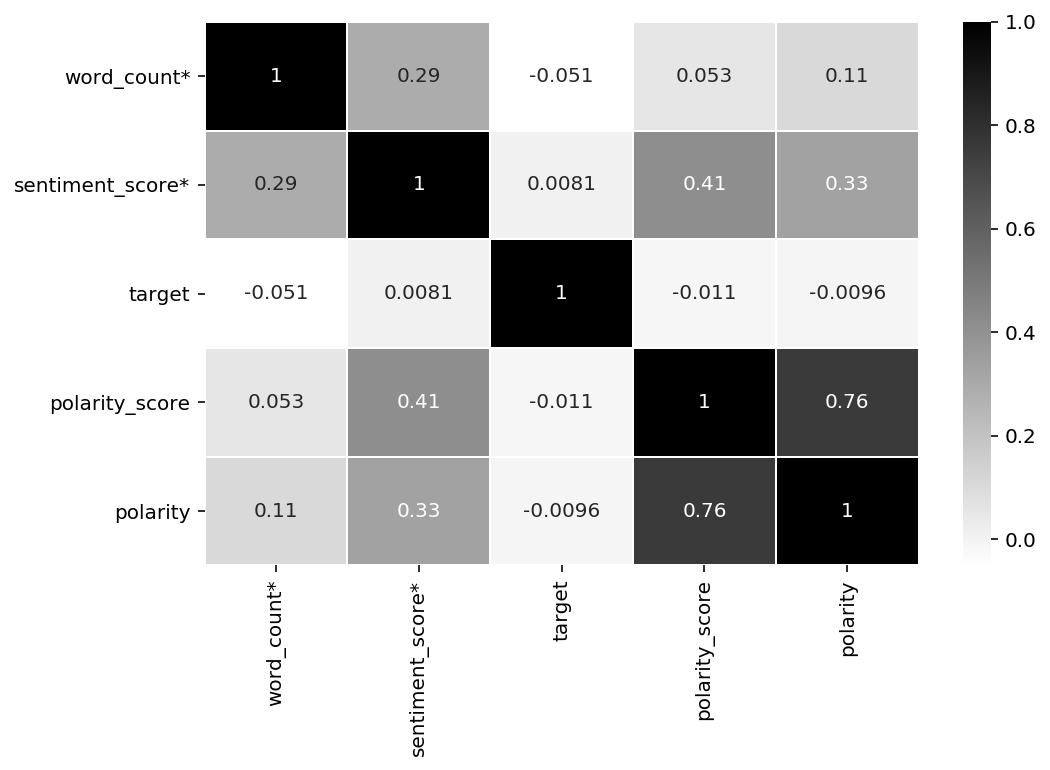

In [63]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(8,5))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)
# plt.savefig("../Figures/corr_plot_before_colDroped1.png")

Let's check out some of the positive and negative sentences.

In [64]:
df_reddit[df_reddit['polarity']==2]['text_merged'].head()

7     nasa expect detail cost fast track moon land p...
13    exit door amp c astronaut leav board astrovan ...
18    nasa new space tradit dazzl astronaut graduat ...
29                            nasa super musculair mice
34                  fun fact could drive bu stripe flag
Name: text_merged, dtype: object

In [65]:
df_reddit[df_reddit['polarity']==0]['text_merged'].head()

8                      went john f kennedi space center
10              x flight part one x plane everyday seri
17    hi could pleas tell black object seem follow i...
24    went kennedi space center birthday got beauti ...
44    hey nasa cloud custom help help onsit intervie...
Name: text_merged, dtype: object

### Vader Sentiment Analysis

Vader works better in detecting negative sentiment.

[nltk_data] Downloading package vader_lexicon to C:\Users\DASLAB
[nltk_data]     Hareland 3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5, 1.0, 'polarity_score using Vader Sentiment Analysis')

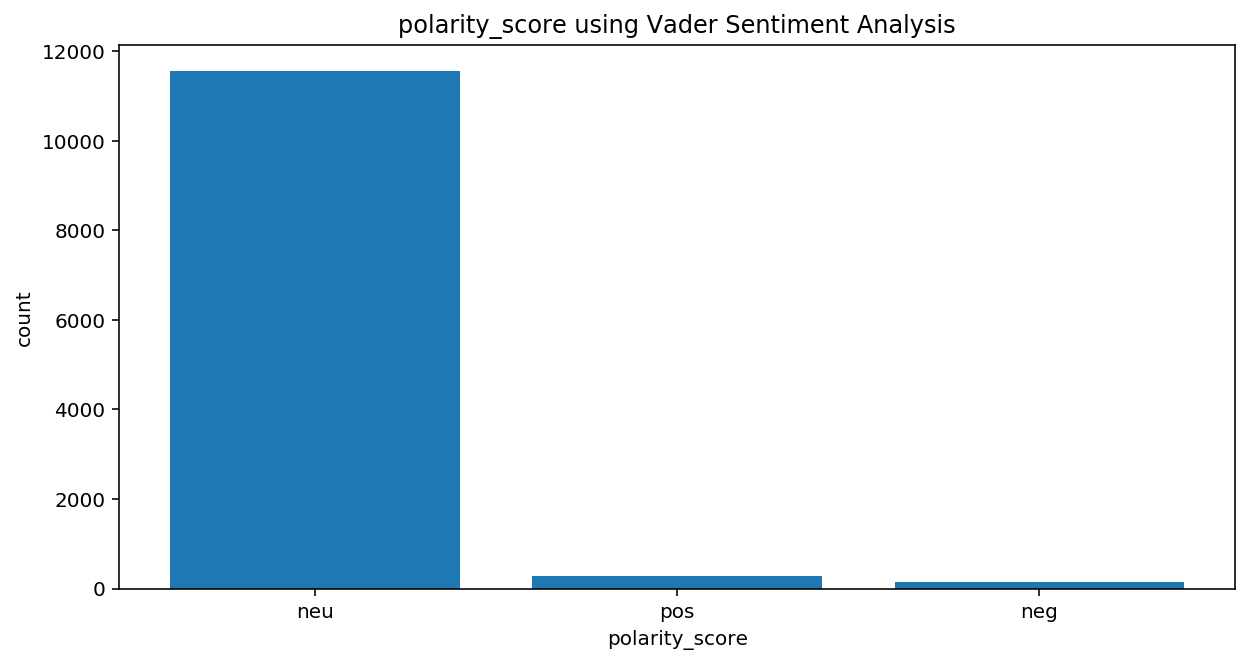

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])


df_reddit['polarity']=df_reddit['text_merged'].map(lambda x: get_vader_score(x))

polarity=df_reddit['polarity'].replace({0:'neg',1:'neu',2:'pos'})
df_reddit['polarity_VSA']=df_reddit['polarity'].replace({0:'neg',1:'neu',2:'pos'})
plt.figure(figsize=(10,5))
plt.bar(polarity.value_counts().index,polarity.value_counts())


plt.xlabel('polarity_score'); 
plt.ylabel('count')
plt.title('polarity_score using Vader Sentiment Analysis')

In [100]:
df_reddit['polarity_VSA']=df_reddit['polarity_VSA'].replace({'neg':0, 'neu':1,'pos':2})

### Named Entity Recognition

Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

In [67]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

initialize the language model

In [68]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### Example

In [69]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')
[(x.text,x.label_) for x in doc.ents]

from spacy import displacy
displacy.render(doc, style='ent')

In [70]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df_reddit['text_merged'].apply(lambda x : ner(x))
# df_reddit['ent']=df_reddit['text_merged'].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]
ent_pd = pd.DataFrame(ent)

In [71]:
df_reddit.insert(0, 'ent', ent_pd)

In [72]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,CARDINAL,star shine saturn ring,4,0.0000,1,0.0,1,neu
1,DATE,smithsonian nation air space museum,5,0.0000,1,0.0,1,neu
2,CARDINAL,incred expand crab nebula,4,0.3182,1,0.0,1,neu
3,CARDINAL,columbia readi st,3,0.0000,1,0.0,1,neu
4,CARDINAL,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,neu


In [73]:
df_reddit['ent'].unique()

array(['CARDINAL', 'DATE', 'GPE', 'QUANTITY', 'ORDINAL', 'TIME', 'NORP',
       'MONEY', 'PERSON', 'LOC', nan], dtype=object)

In [74]:
df_reddit['ent']=df_reddit['ent'].replace({'CARDINAL':1, 'DATE':2, 'GPE':3, 
                                           'QUANTITY':4, 'ORDINAL':5, 'TIME':6, 
                                           'NORP':7, 'MONEY':8, 'PERSON':9, 'LOC':10, 
                                           'NaN':11, '[]':12})


In [88]:
df_reddit['ent'] = df_reddit['ent'].replace(np.nan, 12)

In [90]:
# a=df_reddit['ent'].replace(np.nan, 12)
# a

In [101]:
df_reddit.corr()

,ent,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
ent,1.000000,0.026917,-0.014555,-0.684709,0.000903,-0.014664,-0.014664
word_count*,0.026917,1.000000,0.292337,-0.050679,0.053004,-0.015701,-0.015701
sentiment_score*,-0.014555,0.292337,1.000000,0.008061,0.414946,0.294099,0.294099
target,-0.684709,-0.050679,0.008061,1.000000,-0.011361,0.022208,0.022208
polarity_score,0.000903,0.053004,0.414946,-0.011361,1.000000,0.214703,0.214703
polarity,-0.014664,-0.015701,0.294099,0.022208,0.214703,1.000000,1.000000
polarity_VSA,-0.014664,-0.015701,0.294099,0.022208,0.214703,1.000000,1.000000


In [91]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,1.0,star shine saturn ring,4,0.0000,1,0.0,1,neu
1,2.0,smithsonian nation air space museum,5,0.0000,1,0.0,1,neu
2,1.0,incred expand crab nebula,4,0.3182,1,0.0,1,neu
3,1.0,columbia readi st,3,0.0000,1,0.0,1,neu
4,1.0,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,neu


In [92]:
df_reddit.describe()

,ent,word_count*,sentiment_score*,target,polarity_score,polarity
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.00000
mean,8.981250,14.510500,0.10209,0.500000,0.049904,1.01125
std,4.408989,31.921244,0.30367,0.500021,0.184337,0.19138
min,1.000000,1.000000,-0.99670,0.000000,-1.000000,0.00000
25%,5.000000,5.000000,0.00000,0.000000,0.000000,1.00000
50%,12.000000,8.000000,0.00000,0.500000,0.000000,1.00000
75%,12.000000,13.000000,0.17790,1.000000,0.083333,1.00000
max,12.000000,996.000000,0.99850,1.000000,1.000000,2.00000


In [93]:
import collections
# counter=collections.Counter(corpus)
counter=collections.Counter(ent)
count=counter.most_common()

Visualize the entity frequencies

Text(0.5, 1.0, 'Named Entity Recognition / entity frequencies')

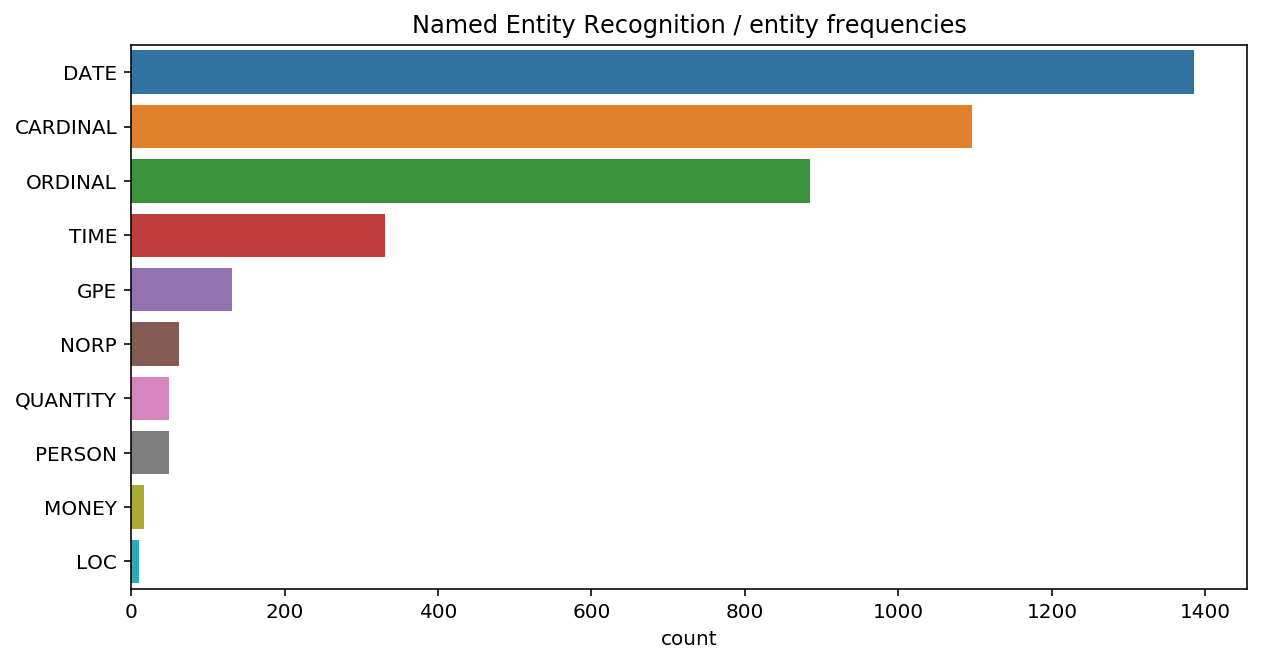

In [94]:
x,y=map(list,zip(*count))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition / entity frequencies')

In [95]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=df_reddit['text_merged'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]

Text(0.5, 1.0, 'Named Entity Recognition frequencies in location')

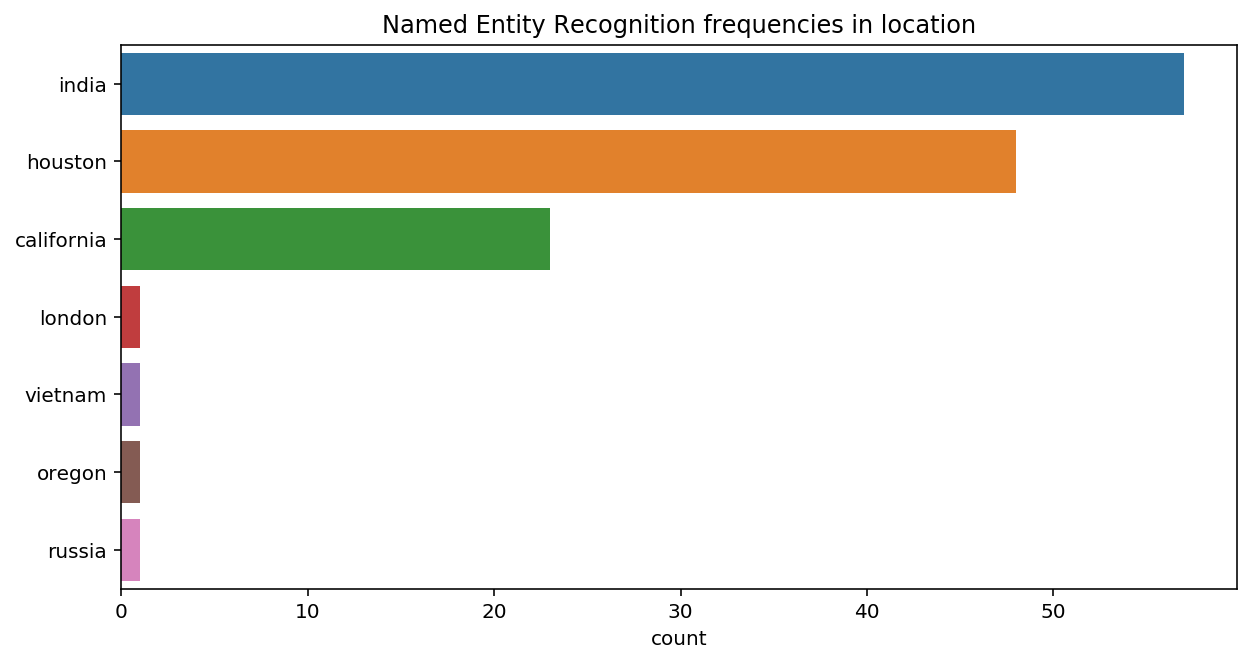

In [96]:
counter=collections.Counter(gpe)
x,y=map(list,zip(*counter.most_common(10)))
plt.figure(figsize=(10,5))
sns.barplot(y,x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition frequencies in location')

In [97]:
per=df_reddit['text_merged'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=collections.Counter(per)
x,y=map(list,zip(*counter.most_common(10)))

Text(0.5, 1.0, 'Named Entity Recognition / frequencies in persons name')

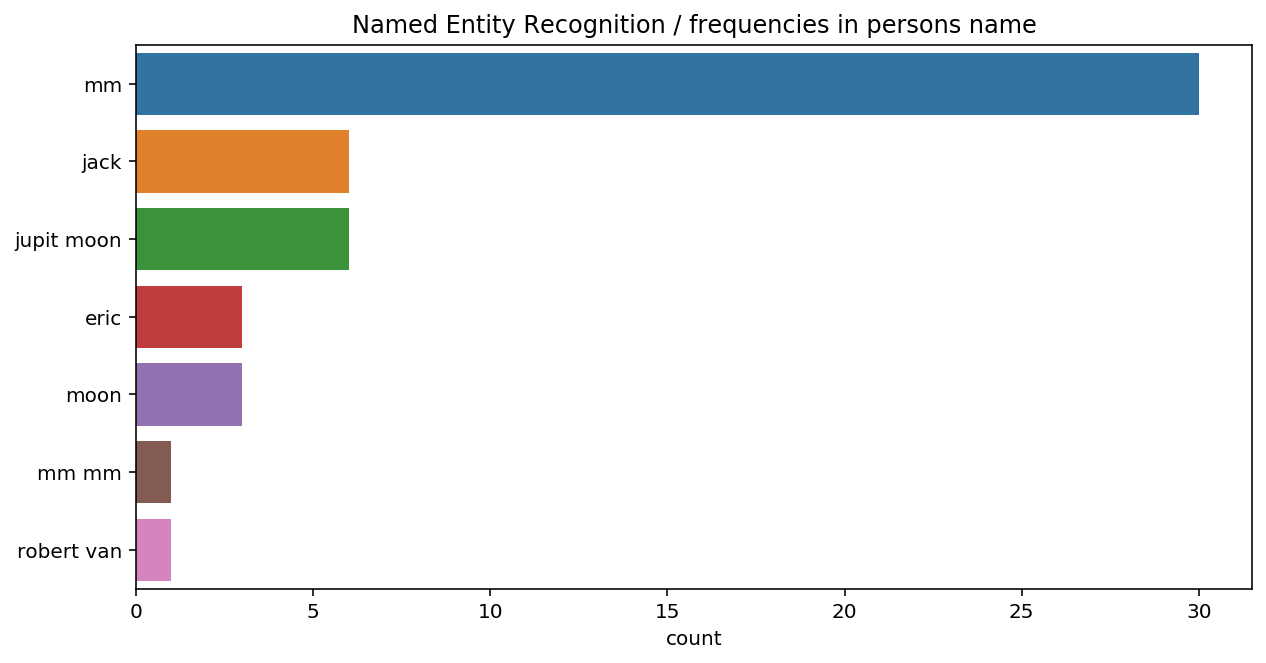

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(y,x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition / frequencies in persons name')

In [102]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,1.0,star shine saturn ring,4,0.0000,1,0.0,1,1
1,2.0,smithsonian nation air space museum,5,0.0000,1,0.0,1,1
2,1.0,incred expand crab nebula,4,0.3182,1,0.0,1,1
3,1.0,columbia readi st,3,0.0000,1,0.0,1,1
4,1.0,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,1


### Exploration through Parts of Speach Tagging in python

#### Example

In [103]:
import nltk
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [104]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', 
                jupyter=True, 
                options={'distance': 90})

In [114]:
def Speech_tag(text):
    
    tokens=word_tokenize(text)
    tag = nltk.pos_tag(tokens)
    
    return tag

tags=df_reddit['text_merged'].apply(lambda x : Speech_tag(x))

In [150]:
# print(len(tags.iloc[0]))
# print(len(tags.iloc[11000]))

In [151]:
# print((tags.iloc[0]))
# print((tags.iloc[0][0]))
# print((tags.iloc[0][0][1]))

In [158]:
from collections import Counter
from itertools import chain

# import pandas as pd

from nltk import word_tokenize, pos_tag

# df = pd.read_csv('myfile.csv', delimiter=';')
# df.columns = ['sent', 'tag']

tok_and_tag = lambda x: pos_tag(word_tokenize(x))

df_reddit['lower_sent'] = df_reddit['text_merged'].apply(str.lower)
df_reddit['tagged_sent'] = df_reddit['lower_sent'].apply(tok_and_tag)

possible_tags = sorted(set(list(zip(*chain(*df_reddit['tagged_sent'])))[1]))

In [159]:
print(len(possible_tags))
print(possible_tags)

35
["''", 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']


In [160]:
df_reddit['tagged_sent'].head()

0    [(star, NN), (shine, NN), (saturn, NN), (ring,...
1    [(smithsonian, JJ), (nation, NN), (air, NN), (...
2    [(incred, JJ), (expand, NN), (crab, NN), (nebu...
3             [(columbia, NN), (readi, VBZ), (st, NN)]
4    [(went, VBD), (ksc, JJ), (christma, NN), (got,...
Name: tagged_sent, dtype: object

In [174]:
list(zip(*df_reddit['tagged_sent'][0]))[1]

('NN', 'NN', 'NN', 'NN')

In [172]:
Counter(list(zip(*df_reddit['tagged_sent'][0]))[1])
Counter(list(zip(*df_reddit['tagged_sent']))[1])

Counter({'NN': 4})

In [161]:
def add_pos_with_zero_counts(counter, keys_to_add):
    for k in keys_to_add:
        counter[k] = counter.get(k, 0)
    return counter


# Detailed steps.
df_reddit['pos_counts'] = df_reddit['tagged_sent'].apply(lambda x: Counter(list(zip(*x))[1]))
df_reddit['pos_counts_with_zero'] = df_reddit['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))
df_reddit['sent_vector'] = df_reddit['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])

# All in one.
df_reddit['sent_vector'] = df_reddit['tagged_sent'].apply(lambda x:
    [count for tag, count in sorted(
        add_pos_with_zero_counts(
            Counter(list(zip(*x))[1]), 
                    possible_tags).most_common()
         )
    ]
)

df2 = pd.DataFrame(df_reddit['sent_vector'].tolist())
df2.columns = possible_tags
Share

IndexError: list index out of range

In [ ]:
# def pos(text):
    
#     pos=nltk.pos_tag(word_tokenize(text))
#     pos=list(map(list,zip(*pos)))[1]
#     return pos

# tags=df_reddit['text_merged'].apply(lambda x : pos(x))
# tags=[x for l in tags for x in l]

# counter=collections.Counter(tags)
# x,y=list(map(list,zip(*counter.most_common(7))))
# plt.figure(figsize=(10,5))
# sns.barplot(x=y,y=x)

### Exploring through text complexity

In [ ]:
# !pip install textstat

In [ ]:
from textstat import flesch_reading_ease
import textstat
df_reddit['text_merged'].\
   apply(lambda x : flesch_reading_ease(x)).hist(bins=200)

In [ ]:
# x=[i for i in range(len(reading)) if reading[i]<5]
# df_reddit.iloc[x]['text_merged'].head()

In [ ]:
pickle.dump(df_reddit, open('../DataSet/df_reddit_for_model.pkl', 'wb'))